# 1. 개념

In [1]:
# 대표적인 한국어 형태소 분석기인 KoNLPy 중 가장 성능이 준수한 MeCab클래스를 활용해 실습하자.

from konlpy.tag import Mecab
import warnings
warnings.filterwarnings('ignore')

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


## (1) 데이터 다운로드 및 분석 

In [26]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


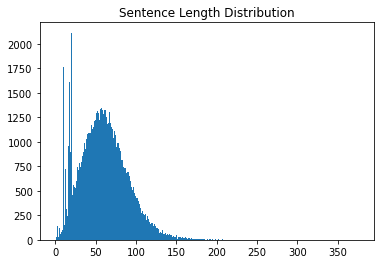

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [5]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


In [6]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [7]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


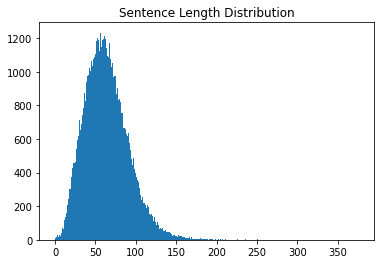

In [8]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

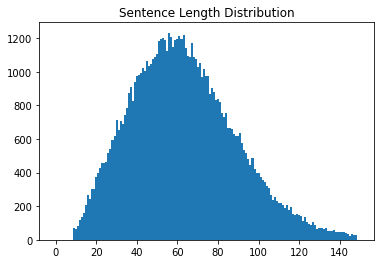

In [9]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

## (2) 형태소 기반 토큰화

### MeCab 기반으로 단어 사전과 Tensor 데이터를 얻어보자

In [10]:
def mecab_split(sentence):
    return mecab.morphs(sentence) # 단어를 쪼개어

mecab_corpus = [] # 리스트로 저장한다

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor)) # 차곡차곡

In [15]:
# tokenize()함수를 사용해 토큰화 진행
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus) # 단어사전, Tensor 데이터가 뙇

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word)) # 단어 사전의 길이 확인

NameError: name 'tokenize' is not defined

### 후에 모델이 생성한 Tensor를 문장으로 Decoding하는 과정

In [ ]:
# 방법 1 : tokenizer.sequences_to_texts() 함수를 사용하여 Decoding

texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]]) # mecab_tensor[100]을 원문으로 되돌리기
print(texts[0])

In [ ]:
'''

# 방법 2 : tokenizer.index_word를 사용하여 Decoding

sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

'''

# 2. 프로젝트 : SentencePiece 사용하기

In [12]:
# 사용할 라이브러리 버전 확인

import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.6.0
1.22.2
3.4.3
0.5.2


## (1) SentencePiece 설치하기
$ pip install sentencepiece

## (2) SentencePiece 모델 학습

In [13]:
'''

# tokenize() 함수
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

'''

"\n\n# tokenize() 함수\ndef tokenize(corpus):  # corpus: Tokenized Sentence's List\n    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')\n    tokenizer.fit_on_texts(corpus)\n\n    tensor = tokenizer.texts_to_sequences(corpus)\n\n    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')\n\n    return tensor, tokenizer\n\n"

In [14]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Mar 25 03:39 korean_spm.model
-rw-r--r-- 1 root root 146213 Mar 25 03:39 korean_spm.vocab


In [19]:
# 학습된 SentencePiece모델을 어떻게 활용하는지 살펴보자.

s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


## (3) Tokenizer 함수 작성

tokenize()함수를 정의할 때, SentencePiece의 경우 동작하는 방식이 단순 토큰화와는 다르다. 따라서 완전히 동일하게 정의하기는 어렵다. 그 대신, 아래의 조건을 만족하는 함수를 정의하도록 한다.

① 매개변수로 토큰화된 문장의 list를 전달하는 대신 **온전한 문장**의 list를 전달
② **생성된 vocab 파일**을 읽어와 {<word>:<idx>} 형태를 가지는 workd_index 사전과 {<idx>:<word>} 형태를 가지는 index_word 사전을 생성하고 함께 **반환** 
③ 리턴값인 tensor는 앞의 함수와 동일하게 토큰화된 후 Encoding된 문장이다. + 바로 학습에 사용할 수 있게 Padding (길이를 맞춰주기 위해)

In [20]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post') # 'post'로 지정하면 시퀀스의 뒤에 패딩이 채워진다. 디폴트는 'pre'

    return tensor, word_index, index_word

In [21]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[1956 5665    5    4 7975 1990    3    0    0    0    0    0    0    0]
 [ 107 1641  101    4    0  417   11    4   14    0 1976    3    3    3]]


## (4) 네이버 영화 감정 분석 문제에 SentencePiece 적용하기

* 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
* 학습된 모델로 sp_tokenize() 메소드 구현하기
* 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
* KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
* (보너스) SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

### 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기

In [2]:
import pandas as pd
import sentencepiece as spm
import urllib.request
import csv

In [3]:
# 데이터를 다운로드하여
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f6023d17520>)

In [4]:
# 데이터 프레임에 저장
naver_df = pd.read_table('ratings.txt')
naver_df[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [5]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 200000


In [6]:
# Null값 제거
print(naver_df.isnull().values.any()) # Null 값이 존재하는지 확인

True


In [7]:
naver_df = naver_df.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(naver_df.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [8]:
print('리뷰 개수 :',len(naver_df)) # 리뷰 개수 출력

리뷰 개수 : 199992


In [9]:
# 199,992개의 샘플을 naver_review.txt 파일에 저장
with open('naver_review.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(naver_df['document']))

In [10]:
# SentencePiece를 통해 단어 집합을 생성
spm.SentencePieceTrainer.Train('--input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999')

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=naver_review.txt --model_prefix=naver --vocab_size=5000 --model_type=bpe --max_sentence_length=9999
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: naver_review.txt
  input_format: 
  model_prefix: naver
  model_type: BPE
  vocab_size: 5000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 9999
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piec

In [11]:
# .vocab 에서 학습된 subwords를 확인
vocab_list = pd.read_csv('naver.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,..,0
4,영화,-1
5,▁영화,-2
6,▁이,-3
7,▁아,-4
8,...,-5
9,▁그,-6


In [12]:
vocab_list.sample(10)

,0,1
2293,▁춤,-2290
2755,더라구요,-2752
983,▁스타,-980
1986,▁SF,-1983
4290,룩,-4287
4262,멈,-4259
97,▁볼,-94
4443,맺,-4440
4135,잤,-4132
3282,화,-3279


In [59]:
len(vocab_list)

5000

설정한대로 5000개의 서브워드가 단어 집합에 존재함.

In [60]:
vocab_size = len(vocab_list)

In [23]:
s = spm.SentencePieceProcessor()
vocab_file = "naver.model"
s.load(vocab_file)

True

### 학습된 모델로 sp_tokenize() 메소드 구현하기

In [24]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./naver.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post') # 'post'로 지정하면 시퀀스의 뒤에 패딩이 채워진다. 디폴트는 'pre'

    return tensor, word_index, index_word

In [27]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print(tensor)

[[ 713 2632 3301  569  837 3276    0    0    0]
 [1665 2443  366   81 3285  147 4641   13    8]]


### 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tqdm import tqdm

#### 1) 데이터 로드

In [29]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")   # 훈련 데이터
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")   # 테스트 데이터

('ratings_test.txt', <http.client.HTTPMessage at 0x7f60235bc7c0>)

In [30]:
# 판다스를 이용하여 훈련데이터는 train_data, 테스트 데이터는 test_data에 저장
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [31]:
# 영화 리뷰 개수, 샘플 확인 - train_data
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력

훈련용 리뷰 개수 : 150000


In [32]:
train_data[:5] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [33]:
# 영화 리뷰 개수, 샘플 확인 - test_data
print('테스트용 리뷰 개수 :',len(test_data)) # 테스트용 리뷰 개수 출력

테스트용 리뷰 개수 : 50000


In [34]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


#### 2) 데이터 정제

In [35]:
# train_data의 데이터 중복 유무 확인
# document 열과 label 열의 중복을 제외한 값의 개수
train_data['document'].nunique(), train_data['label'].nunique()

(146182, 2)

In [36]:
# document 열의 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)

In [37]:
print('총 샘플의 수 :',len(train_data))

총 샘플의 수 : 146183


<AxesSubplot:>

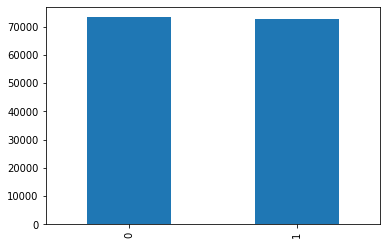

In [38]:
train_data['label'].value_counts().plot(kind = 'bar')

In [39]:
print(train_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  73342
1      1  72841


In [40]:
print(len(train_data))

146183


In [41]:
#알파벳과 공백을 제외하고 모두 제거
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [42]:
# 한글과 공백을 제외하고 모두 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

/tmp/ipykernel_14/3525229848.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [43]:
train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
train_data['document'].replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    790
label         0
dtype: int64


/tmp/ipykernel_14/2260017223.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경


In [49]:
train_data.loc[train_data.document.isnull()][:5]

,id,document,label


In [50]:
train_data = train_data.dropna(how = 'any')
print(len(train_data))

145393


In [71]:
# 테스트 데이터에도 위 정제 과정을 동일하게 진행

test_data.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경
test_data['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_data = test_data.dropna(how='any') # Null 값 제거
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))

전처리 후 테스트용 샘플의 개수 : 48389


/tmp/ipykernel_14/1415160361.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") # 정규 표현식 수행
/tmp/ipykernel_14/1415160361.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['document'] = test_data['document'].str.replace('^ +', "") # 공백은 empty 값으로 변경


In [62]:
X_train = np.array(train_data['document'])
y_train = np.array(train_data['label'])

In [75]:
X_train

array(['아 더빙 진짜 짜증나네요 목소리', '흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나',
       '너무재밓었다그래서보는것을추천한다', ..., '이게 뭐요 한국인은 거들먹거리고 필리핀 혼혈은 착하다',
       '청춘 영화의 최고봉방황과 우울했던 날들의 자화상', '한국 영화 최초로 수간하는 내용이 담긴 영화'],
      dtype=object)

In [76]:
# # 위 트레인 데이터를 인코딩하고싶은데 오류가 남

# X_train = []
# for sentence in train_data['document']: 
#     temp_X = s.EncodeAsIds(sentence) # 노드에서 소개해준 tokensIDs = s.EncodeAsIds
#     X_train.append(temp_X)



# [solution] list로 전환한 뒤 적용
X_train,X_train_word_index, X_train_index_word = sp_tokenize(s, train_data['document'])

In [78]:
# list 상태 ==> ndarray로 바꿔주기
y_train = np.array(list(train_data['label']))

In [79]:
print(X_train[:3])

[[   7 1059   54 2425   39 1972    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0]
 [1649 3478  527  164 1271    4 3497 3348 3460  271 1759 1933 3281   67
   403    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0

In [80]:
print("학습데이터 :",len(X_train))
print("타겟데이터 :",len(y_train))

학습데이터 : 145393
타겟데이터 : 145393


In [81]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
1818/1818 [==============================] - 603s 330ms/step - loss: 0.6933 - acc: 0.5005 - val_loss: 0.6932 - val_acc: 0.4955

Epoch 00001: val_acc improved from -inf to 0.49555, saving model to best_model.h5
Epoch 2/15
1818/1818 [==============================] - 603s 332ms/step - loss: 0.6934 - acc: 0.4984 - val_loss: 0.6931 - val_acc: 0.5045

Epoch 00002: val_acc improved from 0.49555 to 0.50445, saving model to best_model.h5
Epoch 3/15
1818/1818 [==============================] - 604s 332ms/step - loss: 0.6932 - acc: 0.5014 - val_loss: 0.6933 - val_acc: 0.4955

Epoch 00003: val_acc did not improve from 0.50445
Epoch 4/15
 672/1818 [==========>...................] - ETA: 5:49 - loss: 0.6933 - acc: 0.4995

KeyboardInterrupt: 

# 회고

1. NLP는 벼락치기가 불가능하군요,,,, 반성합니다,,,  미리미리 하자 나자신 ㅠ^ㅠ
2. NLP는 앞선 내용에 익숙해지지 않으면 뒤로 갈수록 어려워질 수 있다고 하셨는데, 돌아서면 까먹으니 무조건 복습각입니다.
3. 한국어를 토큰화할 때 형태소 분석기와 Subword 기반 토큰화 중에서 어떤 것을 선택하면 좋을지에 대해서 자세하게 다뤄주신 부분이 공부가 많이 되었습니다! (엑소브레인의 Bert모델 중 한국어 전용 형태소 분석기 토크나이저를 사용한 버전이 한국어에 특화된 만큼 정확하게 동작한다면 성능이 좋을 수 있지만 현장에서는 SentencePiece같은 Subword기반 토크나이저가 각광받는 이유 - 언어는 계속 변하므로, 정교한 형태소 분석기는 성능을 유지하기 위해서는 지속적으로 데이터를 관리하고 유지보수 작업을 해줘야함. 반면에, SentencePiece모델은 코퍼스데이터에서 쉽게 추출하여 생성 가능하기도 하고, Subword 기반이라 새로 만들어지는 단어에 대한 OOV 문제에서도 robust하게 대처할 수 있다는 강점이 있다는 점 + 언어에 중립적이라 여러 언어가 섞여 나오는 텍스트를 처리하는데에도 능함 + 특정언어에 대한 전문지식이 없이도 엔지니어가 그 언어에 대한 작업을 손쉽게 진행할 수 있음 + 그 언어에 특화된 토크나이저의 성능에 뒤지지 않거나 대체로 능가하는 성능)


# 정리
https://www.notion.so/2-d3fab03af4a84e03a94621d26860f1aa